In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel("data.xlsx")

In [26]:
df

,leader,polygon,id,subpolygon,stating_type,date_list,mileage_list,date_telematics,mileage_telematics,penalty,driving_style
0,True,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,NaT,158.0,NaT,140.26,17.0,3.5
1,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5
2,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5
3,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-09,7.0,2024-04-09,7.00,NaN,3.5
4,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...
4396,False,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-28,8.0,2024-04-28,8.00,NaN,5.2
4397,False,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-30,46.0,2024-04-30,46.00,NaN,5.2
4398,True,Северная ДМ,М777КХ07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,NaT,11.0,NaT,0.00,0.0,5.3
4399,False,Северная ДМ,М777КХ07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-05,3.0,NaT,NaN,9.0,5.3


In [27]:
df['penalty'] = df['penalty'].fillna(1)
if (df['penalty'] == 0).any():
    df['penalty'] == 1

df['penalty']

0       17.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
4396     1.0
4397     1.0
4398     0.0
4399     9.0
4400     1.0
Name: penalty, Length: 4401, dtype: float64

# Графики по штрафам, манере вождения и пробегу

In [28]:
rate_polygons_group = df[df.leader == True].groupby('polygon')
rate_polygons = rate_polygons_group[['mileage_list', 'mileage_telematics', 'penalty']].sum()
rate_polygons = rate_polygons.join(rate_polygons_group[['driving_style']].mean())

rate_polygons['mileage_deviation'] = (1 - (rate_polygons['mileage_list'] / rate_polygons['mileage_telematics'])).abs() * 100

rate_polygons['driving_style_score'] = rate_polygons['driving_style'] / rate_polygons['driving_style'].max()

rate_polygons['penalty_score'] = 1 - rate_polygons['penalty'] / rate_polygons['penalty'].max()

rate_polygons = rate_polygons.reset_index()
rate_polygons

,polygon,mileage_list,mileage_telematics,penalty,driving_style,mileage_deviation,driving_style_score,penalty_score
0,Горьковская дир,163788.27,147695.28,621.0,3.868116,10.896076,0.902252,0.081361
1,Клнг. ДУТСК,27903.42,4618.77,131.0,3.596875,504.130970,0.838984,0.806213
2,Московская ДМ,196578.51,183048.09,676.0,3.342466,7.391730,0.779642,0.000000
3,Окт ДМ,46844.80,48498.36,360.0,3.619753,3.409517,0.844320,0.467456
4,Северная ДМ,275400.14,204838.43,394.0,4.287179,34.447496,1.000000,0.417160


## Манера вождения

In [29]:
graph1 = pd.DataFrame({'polygon': rate_polygons['polygon'], 'driving_style': rate_polygons['driving_style']})
graph1_sorted = graph1.sort_values(by='driving_style', ascending=False)
graph1_sorted

,polygon,driving_style
4,Северная ДМ,4.287179
0,Горьковская дир,3.868116
3,Окт ДМ,3.619753
1,Клнг. ДУТСК,3.596875
2,Московская ДМ,3.342466


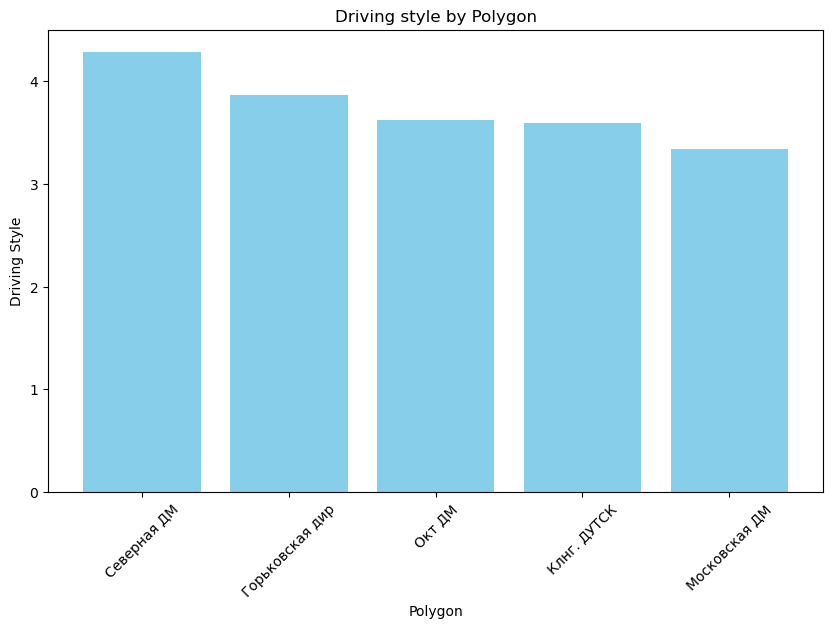

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(graph1_sorted['polygon'], graph1_sorted['driving_style'], color='skyblue')
plt.xlabel('Polygon')
plt.ylabel('Driving Style')
plt.title('Driving style by Polygon')
plt.xticks(rotation=45)
plt.show()

## Штрафы

In [31]:
graph1 = pd.DataFrame({'polygon': rate_polygons['polygon'], 'penalty': rate_polygons['penalty']})
graph1_sorted = graph1.sort_values(by='penalty')

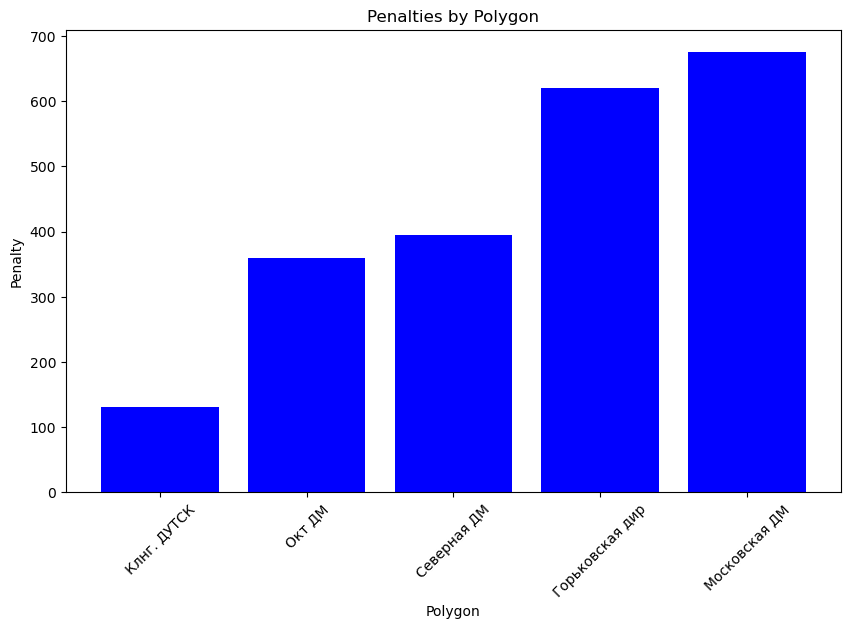

In [32]:
plt.figure(figsize=(10,6))
plt.bar(graph1_sorted['polygon'], graph1_sorted['penalty'], color='blue')
plt.xlabel('Polygon')
plt.ylabel('Penalty')
plt.title('Penalties by Polygon')
plt.xticks(rotation=45)
plt.show()

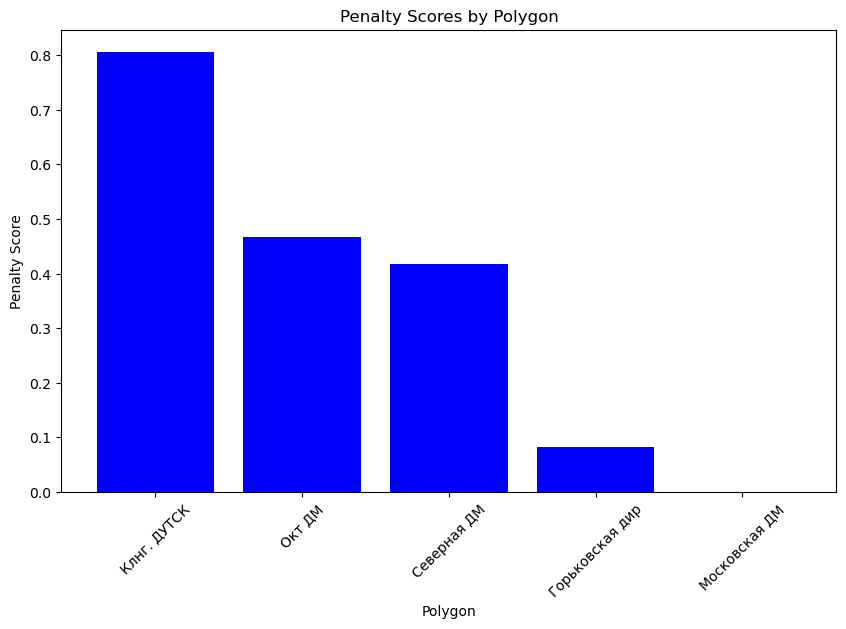

In [33]:
res = pd.DataFrame({'polygon': rate_polygons['polygon'], 'res': rate_polygons['penalty_score']})
res_sorted = res.sort_values(by='res', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(res_sorted['polygon'], res_sorted['res'], color='blue')
plt.xlabel('Polygon')
plt.ylabel('Penalty Score')
plt.title('Penalty Scores by Polygon')
plt.xticks(rotation=45)
plt.show()

# Пробег

In [34]:
graph1 = pd.DataFrame({'polygon': rate_polygons['polygon'], 'mileage_deviation': rate_polygons['mileage_deviation']})
graph1_sorted = graph1.sort_values(by='mileage_deviation')

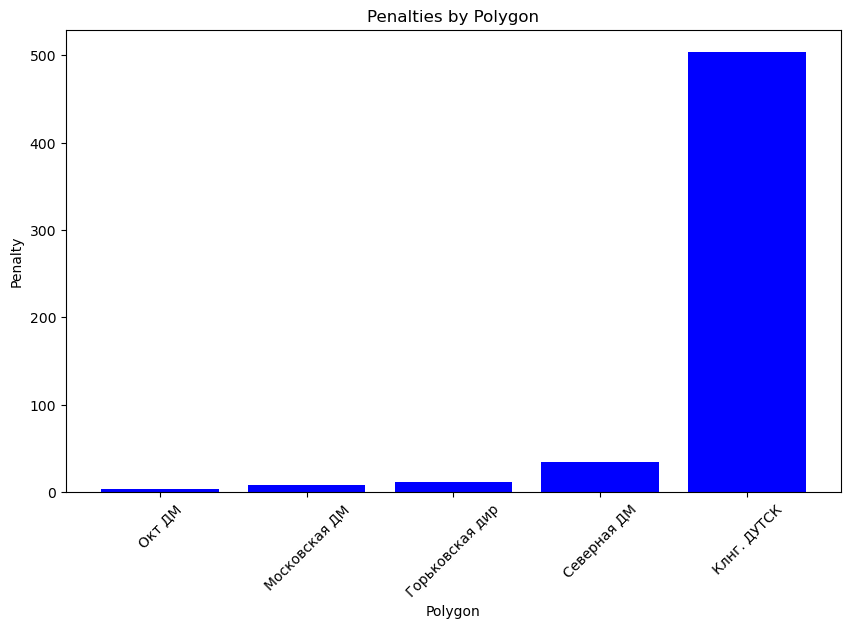

In [35]:
plt.figure(figsize=(10,6))
plt.bar(graph1_sorted['polygon'], graph1_sorted['mileage_deviation'], color='blue')
plt.xlabel('Polygon')
plt.ylabel('Penalty')
plt.title('Penalties by Polygon')
plt.xticks(rotation=45)
plt.show()

# Разные аггрегации

In [36]:
df

,leader,polygon,id,subpolygon,stating_type,date_list,mileage_list,date_telematics,mileage_telematics,penalty,driving_style
0,True,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,NaT,158.0,NaT,140.26,17.0,3.5
1,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-04,9.0,2024-04-02,3.00,1.0,3.5
2,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-08,5.0,2024-04-08,5.00,1.0,3.5
3,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-09,7.0,2024-04-09,7.00,1.0,3.5
4,False,Окт ДМ,Б/Н,ГТС Выборг,В целевой структуре парка,2024-04-10,12.0,2024-04-10,12.00,2.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...
4396,False,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-28,8.0,2024-04-28,8.00,1.0,5.2
4397,False,Северная ДМ,Р390ХН07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-30,46.0,2024-04-30,46.00,1.0,5.2
4398,True,Северная ДМ,М777КХ07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,NaT,11.0,NaT,0.00,0.0,5.3
4399,False,Северная ДМ,М777КХ07,Архангельская механизированная дистанция ПРР и КО,В целевой структуре парка,2024-04-05,3.0,NaT,NaN,9.0,5.3


In [43]:
min_date = df['date_list'].dropna().min()
max_date = df['date_list'].dropna().max()

In [97]:
def collect_groups_by_date(df: pd.DataFrame):
	df = df.copy()
	tdf = df[df.leader == False].groupby(['polygon', 'date'])[['penalty', 'mileage_list', 'mileage_telematics']].sum()
	tdf = tdf.join(df[df.leader == False].groupby(['polygon', 'date'])[['driving_style']].mean())

	return tdf

In [98]:
poldatel_gb = collect_groups_by_date(df.rename(columns={'date_list': 'date'}))
poldatet_gb = collect_groups_by_date(df.rename(columns={'date_telematics': 'date'}))

In [99]:
poldate_data = poldatel_gb.join(poldatet_gb, on=['polygon', 'date'], lsuffix='_list', rsuffix='_telematics')

In [100]:
poldate_data

penalty_list  mileage_list_list  \
polygon         date                                          
Горьковская дир 2024-04-01          26.0            8103.41   
                2024-04-02          10.0            3443.00   
                2024-04-03          26.0            6711.00   
                2024-04-04          14.0            5093.00   
                2024-04-05          18.0            5025.00   
...                                  ...                ...   
Северная ДМ     2024-04-26          32.0           10237.30   
                2024-04-27          17.0            3452.00   
                2024-04-28          21.0            8977.00   
                2024-04-29          15.0            6632.00   
                2024-04-30          16.0            6086.00   

                            mileage_telematics_list  driving_style_list  \
polygon         date                                                      
Горьковская дир 2024-04-01                  4871.00            4.940000   
                2024-04-02                  1730.00            4.900000   
                2024-04-03                  3393.00            5.030769   
                2024-04-04                  3076.00            5.178571   
                2024-04-05                  2478.00            5.133333   
...                                             ...                 ...   
Северная ДМ     2024-04-26                  5280.72            5.106250   
                2024-04-27                  2501.65            5.223529   
                2024-04-28                  4338.00            5.085714   
                2024-04-29                  4351.00            5.120000   
                2024-04-30                  3313.00            5.125000   

                            penalty_telematics  mileage_list_telematics  \
polygon         date                                                      
Горьковская дир 2024-04-01                40.0                  4331.00   
                2024-04-02                10.0                  1730.00   
                2024-04-03                26.0                  2685.00   
                2024-04-04                19.0                  3833.00   
                2024-04-05                21.0                  2823.00   
...                                        ...                      ...   
Северная ДМ     2024-04-26                21.0                  4468.58   
                2024-04-27                10.0                  2497.00   
                2024-04-28                13.0                  4622.00   
                2024-04-29                 9.0                  4422.00   
                2024-04-30                14.0                  2845.00   

                            mileage_telematics_telematics  \
polygon         date                                        
Горьковская дир 2024-04-01                        8768.20   
                2024-04-02                        1957.00   
                2024-04-03                        6944.00   
                2024-04-04                        7089.00   
                2024-04-05                        4045.00   
...                                                   ...   
Северная ДМ     2024-04-26                        6621.72   
                2024-04-27                        3452.65   
                2024-04-28                        5281.00   
                2024-04-29                        4362.00   
                2024-04-30                        4433.00   

                            driving_style_telematics  
polygon         date                                  
Горьковская дир 2024-04-01                  4.870270  
                2024-04-02                  4.960000  
                2024-04-03                  4.911538  
                2024-04-04                  5.157895  
                2024-04-05                  5.035000  
...                                              ...  
Северная ДМ     2024-0

In [104]:
agg_1 = poldate_data.loc['Горьковская дир']

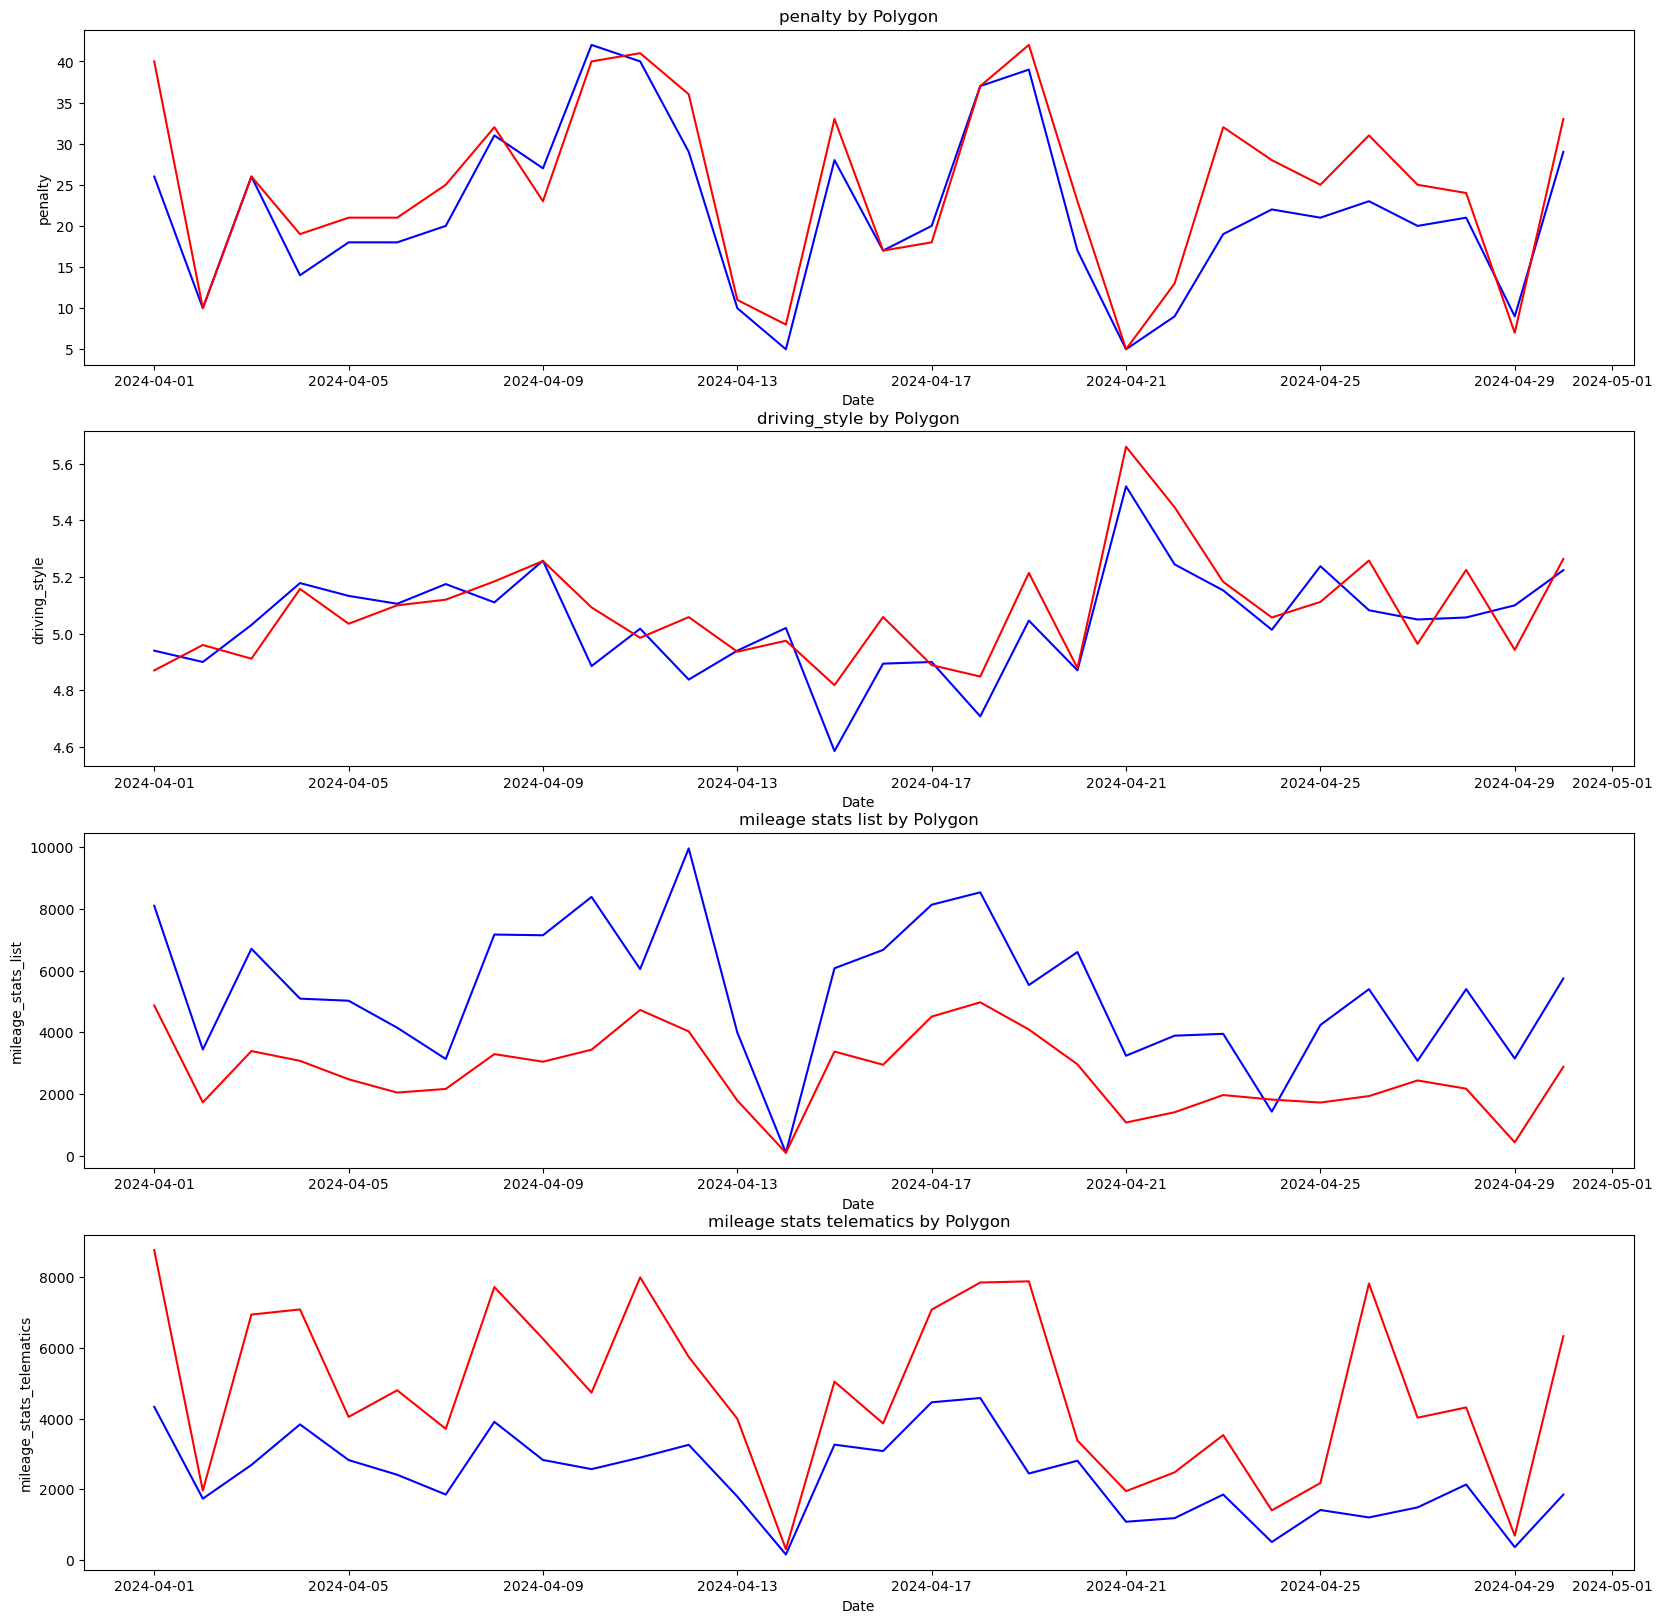

In [110]:
cols = ['penalty', 'driving_style']

fig, axs = plt.subplots(4, 1, figsize = (20, 20))

i = 0
		
for ax in axs[:2]:
	ax.plot(agg_1.index, agg_1[cols[i]+'_list'], color='blue')
	ax.plot(agg_1.index, agg_1[cols[i]+'_telematics'], color='red')
	ax.set_ylabel(cols[i])
	ax.set_xlabel('Date')
	ax.set_title(cols[i] + ' by Polygon')

	i += 1

ax = axs[i]
ax.plot(agg_1.index, agg_1['mileage_list_list'], color='blue')
ax.plot(agg_1.index, agg_1['mileage_telematics_list'], color='red')
ax.set_ylabel('mileage_stats_list')
ax.set_xlabel('Date')
ax.set_title('mileage stats list by Polygon')

i+= 1


ax = axs[i]
ax.plot(agg_1.index, agg_1['mileage_list_telematics'], color='blue')
ax.plot(agg_1.index, agg_1['mileage_telematics_telematics'], color='red')
ax.set_ylabel('mileage_stats_telematics')
ax.set_xlabel('Date')
ax.set_title('mileage stats telematics by Polygon')

plt.show()